# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Diah Ayu Susilowati
- **Email:** m268b4kx1105@bangkit.academy
- **ID Dicoding:** dhayyue

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren rata-rata nilai transaksi (average payment) dan jumlah produk yang terjual dalam beberapa bulan terakhir?
2. Kategori Produk Mana yang Mendapatkan Pendapatan Tertinggi dan Terendah?
3. Berapa jumlah pesanan dari masing-masing negara bagian (state)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib

## 
## Data Wrangling

### Gathering Data

Data yang digunakan adalah E-Commerce Public Dataset yang terdiri dari data geolocation, orders, order items, order reviews, customers, order payments, products, sellers, dan product category.

In [2]:
customers = pd.read_csv("customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
location = pd.read_csv("geolocation_dataset.csv")
location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items = pd.read_csv("order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_pays = pd.read_csv("order_payments_dataset.csv")
order_pays.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_revs = pd.read_csv("order_reviews_dataset.csv")
order_revs.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders = pd.read_csv("orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
products = pd.read_csv("products_dataset.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
product_cat = pd.read_csv("product_category_name_translation.csv")
product_cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
sellers = pd.read_csv("sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### 
### Assessing Data

#### Memeriksa data type pada setiap DataFrame.

In [13]:
print(location.info(), "\n")
print(orders.info(), "\n")
print(order_items.info(), "\n")
print(order_revs.info(), "\n")
print(customers.info(), "\n")
print(order_pays.info(), "\n")
print(products.info(), "\n")
print(sellers.info(), "\n")
print(product_cat.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  ob


Berdasarkan hasil analisis, ditemukan adanya ketidaksesuaian tipe data pada DataFrame orders, khususnya di kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date, di mana kolom-kolom tersebut seharusnya bertipe datetime namun teridentifikasi bertipe object. Hal serupa juga terjadi pada DataFrame order_items di kolom shipping_limit_date dan di DataFrame order_reviews pada kolom review_creation_date. Ketidaksesuaian tipe data ini akan diperbaiki pada tahap pembersihan data (data cleaning).

#### 
#### Memeriksa data null pada setiap DataFrames.

In [14]:
print("Info data null pada location: \n", location.isna().sum(), "\n")
print("Info data null pada orders: \n", orders.isna().sum(), "\n")
print("Info data null pada order items: \n", order_items.isna().sum(), "\n")
print("Info data null pada order reviews: \n", order_revs.isna().sum(), "\n")
print("Info data null pada customers: \n", customers.isna().sum(), "\n")
print("Info data null pada order payments: \n", order_pays.isna().sum(), "\n")
print("Info data null pada product: \n", products.isna().sum(), "\n")
print("Info data null pada sellers: \n", sellers.isna().sum(), "\n")
print("Info data null pada product category: \n", product_cat.isna().sum(), "\n")

Info data null pada location: 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

Info data null pada orders: 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

Info data null pada order items: 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Info data null pada order reviews: 
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creat

Berdasarkan hasil analisis, ditemukan adanya data null di beberapa kolom pada DataFrame orders, yaitu order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Selain itu, pada DataFrame order_reviews terdapat data null di kolom review_comment_title dan review_comment_message. Sedangkan pada DataFrame products, data null ditemukan di kolom product_category_name, product_name_length, product_description_length, product_photos_qt, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm.

#### 
#### Memeriksa data duplicate pada setiap DataFrame.

In [15]:
print("Jumlah duplikasi location: ", location.duplicated().sum(), "\n")
print("Jumlah duplikasi orders: ", orders.duplicated().sum(), "\n")
print("Jumlah duplikasi order items: ", order_items.duplicated().sum(), "\n")
print("Jumlah duplikasi order reviews: ", order_revs.duplicated().sum(), "\n")
print("Jumlah duplikasi customers: ", customers.duplicated().sum(), "\n")
print("Jumlah duplikasi order payments: ", order_pays.duplicated().sum(), "\n")
print("Jumlah duplikasi products: ", products.duplicated().sum(), "\n")
print("Jumlah duplikasi sellers: ", sellers.duplicated().sum(), "\n")
print("Jumlah duplikasi product category: ", product_cat.duplicated().sum(), "\n")

Jumlah duplikasi location:  261831 

Jumlah duplikasi orders:  0 

Jumlah duplikasi order items:  0 

Jumlah duplikasi order reviews:  0 

Jumlah duplikasi customers:  0 

Jumlah duplikasi order payments:  0 

Jumlah duplikasi products:  0 

Jumlah duplikasi sellers:  0 

Jumlah duplikasi product category:  0 



Terdapat duplikat pada dataset location sehingga harus dilakukan drop duplikat pada tahap data cleaning.

#### 
#### Describe semua DataFrame.

In [16]:
print("Data describe location:\n", location.describe(include="all"), "\n")
print("Data describe orders:\n", orders.describe(include="all"), "\n")
print("Data describe order items:\n", order_items.describe(include="all"), "\n")
print("Data describe order reviews:\n", order_revs.describe(include="all"), "\n")
print("Data describe customers:\n", customers.describe(include="all"), "\n")
print("Data describe order payments:\n", order_pays.describe(include="all"), "\n")
print("Data describe products:\n", products.describe(include="all"), "\n")
print("Data describe sellers:\n", sellers.describe(include="all"), "\n")
print("Data describe product category:\n", product_cat.describe(include="all"), "\n")

Data describe location:
         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                  1.000163e+06     1.000163e+06     1.000163e+06   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   3.657417e+04    -2.117615e+01    -4.639054e+01   
std                    3.054934e+04     5.715866e+00     4.269748e+00   
min                    1.001000e+03    -3.660537e+01    -1.014668e+02   
25%                    1.107500e+04    -2.360355e+01    -4.857317e+01   
50%                    2.653000e+04    -2.291938e+01    -4.663788e+01   
75%                    6.350400e+04    -1.997962e+01    -4.376771e+01   
max                    9.999000e+04     4.506593e+01     1.211054e+02   

       geolocation_city geolocation_state  
count           1000163           1000163  
unique    

### 
### Cleaning Data

#### Membersihkan dataset geolocation

karena data duplikat sehingga dilakukan drop duplicate.

In [17]:
location.drop_duplicates(inplace=True)

print("Jumlah duplikasi location: ", location.duplicated().sum())

Jumlah duplikasi location:  0


#### 
#### Membersihkan dataset orders

Dataset orders merupakan dataset yang paling krusial karena berisi informasi penting terkait aktivitas di e-commerce. Dalam analisis data ini, hanya data orders yang sudah berhasil dikirimkan yang akan digunakan.

In [18]:
#melihat jumlah order
print(orders["order_status"].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [19]:
# menghitung jumlah data berdasarkan delivered_order
delivered_percentage = (orders["order_status"].value_counts()["delivered"] / len(orders)) * 100
print("Hanya mengambil data delivered saja, data yang diperoleh sejumlah " + str(round(delivered_percentage, 2)) + "% of data")

Hanya mengambil data delivered saja, data yang diperoleh sejumlah 97.02% of data


In [20]:
# menghapus data
delivered_orders = orders.drop(orders[orders['order_status'] != 'delivered'].index)

orders = delivered_orders
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [21]:
# memeriksa missing value
orders.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

terdapat 8 data yang null pada kolom *order_delivered_customer_date* yang berisikan data tanggal order diterima oleh costumer. Data ini akan dihapus/drop.

In [22]:
# drop data null pada order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date
orders = orders.dropna(subset=["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"])
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [25]:
# mengubah tipe data
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders.loc[:, column] = pd.to_datetime(orders[column])

orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
 8   delivered_on_time              96455 non-null  object        
dtypes: datetime64[ns](5), object(4)
memory usage: 7.4+ MB


In [27]:
orders.loc[:, "delivered_on_time"] = np.where(orders["order_delivered_customer_date"] <= orders["order_estimated_delivery_date"], "On Time", "Late")

In [28]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
10882,cb5945f4563c333d6e2c23de7b26af14,dad2b21e16e7936b4b84162eba89a991,delivered,2017-12-02 01:01:11,2017-12-02 01:14:24,2017-12-06 20:05:02,2017-12-08 23:42:19,2017-12-20,On Time
69167,9d141b2bebc8cf4060d3fe3e0d2f0b8d,c86715dcba3227e77d22ce56b9fe1356,delivered,2018-08-21 15:16:26,2018-08-22 10:50:23,2018-08-23 15:55:00,2018-08-25 12:48:38,2018-08-27,On Time
97306,66f249e4d7ab2f3872de7bd6d74719dd,810923268bc2be268d447dd5c892a5ce,delivered,2018-04-12 14:59:50,2018-04-13 12:50:48,2018-04-17 01:03:59,2018-05-07 20:42:05,2018-05-09,On Time
40003,67a3eb1dd398761dcbd4773e7d811cf6,5e0b1614f35426a60e29e7897c5935ee,delivered,2018-02-20 17:41:01,2018-02-20 17:55:22,2018-02-22 00:29:42,2018-03-04 12:03:46,2018-03-12,On Time
590,ed3b269b4badaf0126050c9d4f7b854c,8df348aaafe2a0df5f1ad620b64095f9,delivered,2018-07-12 22:14:06,2018-07-12 22:25:13,2018-07-18 07:50:00,2018-07-23 17:48:39,2018-07-27,On Time


#### Membersihkan dataset order items

Terdapat kesalahan tpe data

In [29]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items[column] = pd.to_datetime(order_items[column])

order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### membersihkan data order reviews

Pada kolom *review_comment_title*, dan *review_comment_message* terdapat data null

In [30]:
# melihat missing value di review_comment_title
order_revs[order_revs.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [31]:
# menghapus kolom review_comment_title
order_revs.drop("review_comment_title", axis=1, inplace=True)

In [32]:
# melihat missing value di review_comment_message
order_revs[order_revs.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [33]:
order_revs["review_comment_message"] = order_revs["review_comment_message"].fillna("No Comment")

print("Data null pada order reviews: \n", order_revs.isna().sum())

Data null pada order reviews: 
 review_id                  0
order_id                   0
review_score               0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


In [34]:
# mengubah tipe data
datetime_columns = ["review_creation_date"]

for column in datetime_columns:
  order_revs[column] = pd.to_datetime(order_revs[column])

order_revs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_message   99224 non-null  object        
 4   review_creation_date     99224 non-null  datetime64[ns]
 5   review_answer_timestamp  99224 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.5+ MB


#### 
#### membersihkan dataset products


Untuk kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm, masing-masing ditemukan 2 data yang kosong. Oleh karena itu, data yang mengandung nilai kosong pada kolom-kolom tersebut akan dihapus. Selain itu, kolom product_name_length dan products_description_length dianggap tidak relevan dalam konteks analisis pertanyaan bisnis, sehingga kedua kolom tersebut akan dihilangkan dari dataset.

In [35]:
products.dropna(subset=["product_name_lenght", "product_description_lenght", "product_height_cm", "product_width_cm"], inplace=True)

In [36]:
products["product_photos_qty"] = products["product_photos_qty"].fillna(value=0)

In [37]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## 
## Exploratory Data Analysis (EDA)

### explore customers

In [38]:
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
74389,3298ab6fddfdd074bfc8d7e1f7f3da95,ad66a32797bd6ae83f92661e78b2f279,29102,vila velha,ES
83399,3d7f68f4b6d4afd0a243b5f6bc894b7c,2e2723098823ec0ea5eaf4d0fcce7980,3503,sao paulo,SP
33422,6c5beb24690ae5ae0ebec981a59f6aa2,b0183f00b5c973760fe06afd240f6396,75526,itumbiara,GO
9550,38fa25096a695e1972739e2dd6821f83,3e36312a56bdb312242490706752940b,13059,campinas,SP
95943,8c214c704bfb4f7a9044b714ea19dfca,51380d57536cda6e31c1013f4ffaa739,13330,indaiatuba,SP


In [39]:
customers.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [40]:
# melihat demografi pelanggan berdasarkan customer city.
customers.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo             15540
rio de janeiro         6882
belo horizonte         2773
brasilia               2131
curitiba               1521
                      ...  
ponto novo                1
populina                  1
porteiras                 1
portela                   1
pitanga de estrada        1
Name: customer_id, Length: 4119, dtype: int64

In [41]:
# melihat demografi pelanggan berdasarkan customer state
customers.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### explore location

In [42]:
location.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
922729,89176,-27.300525,-49.790185,trombudo central,SC
637458,37890,-21.363811,-46.510987,muzambinho,MG
330561,14024,-21.211565,-47.805412,ribeirão preto,SP
504932,27211,-22.489330,-44.085035,volta redonda,RJ
587074,35160,-19.503935,-42.570213,ipatinga,MG


### explore order_items

In [43]:
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
21790,31c5b1c46eed53925a1f2feb3493ba31,1,5f504b3a1c75b73d6151be81eb05bdc9,834f3294fba9f932f56edc879193f925,2017-09-22 17:15:19,610.0,65.01
25525,3a0ef207d0d68b9409177eb5829032f6,1,192406641723dcce37e6181abf9aba18,d91fb3b7d041e83b64a00a3edfb37e4f,2018-07-26 19:04:28,64.6,8.19
106938,f3084f2732a99c1ed0707032aca45026,2,dfb97c88e066dc22165f31648efe1312,8581055ce74af1daba164fdbd55a40de,2017-12-19 02:37:31,139.0,27.29
90035,cc86aa6e200c4c5a49a6ef02a690c3d2,1,02ee0862685e90b57cc241b7c9885f95,fe2032dab1a61af8794248c8196565c9,2018-04-05 03:15:27,199.0,9.75
51189,745d2763c76bb75f1267554899ed96da,1,6171e0ffb665e527d521c2435e065644,44073f8b7e41514de3b7815dd0237f4f,2017-05-23 19:42:34,93.5,15.40


### explore order_pays

In [44]:
order_pays.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
16994,31002d1cf4364e884a8a59e0e0bc2373,1,credit_card,2,66.60
91127,8ffdb23dc30d4050e387117034445f98,1,credit_card,5,150.89
64475,3b43a1faa9745dfcd8ef87937f4cab08,1,credit_card,5,94.74
86293,6189844031702fdf168d8194d504bc0b,1,credit_card,3,38.22
41012,5bda3e4d7080c484cd646a53165a7892,2,voucher,1,250.00


### explore order_revs

In [45]:
order_revs.sample(5)

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
80018,b2878c7c98f3850be41f1910f680172c,7630cf9ad47735d82f65e6e87beefb73,5,No Comment,2017-09-01,2017-09-02 01:10:09
92951,005411e5e211119db98b88eea9b7c54b,92513d9a04507b68515a1866806bcf6c,5,No Comment,2018-08-25,2018-09-06 12:00:52
60936,0ff8886584271aa53a81ea67bb5dd89e,85590544453efd501d242d84acdf9990,2,muito bom gostei do atendimento veio bem antes...,2017-09-23,2017-09-25 12:56:11
73837,19bae8afb9167a8112a7833a2ba0a569,3908808de1bc14e2592cbdd80fd41729,5,No Comment,2017-05-19,2017-05-23 03:25:27
1828,cb7202e34a70aaf7e40ef7c532844240,f47a19bfce7086d0e3ddfa0633d20035,5,No Comment,2017-06-02,2017-06-05 10:36:03


### explore orders

In [46]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
35397,0fc8b7fbf6a7c5ab753e2e3d0ae70d8f,9d8b2a0211096189deeed55864ca3f7e,delivered,2018-08-05 14:43:30,2018-08-05 14:50:22,2018-08-07 21:27:00,2018-08-14 03:56:47,2018-08-16,On Time
77930,33bb79c28616262f5e3fdcf5e678b266,24fe6e2ab7cb4705716e683ceb471d11,delivered,2017-08-04 14:46:51,2017-08-05 14:35:34,2017-08-08 18:13:28,2017-08-15 14:04:05,2017-08-24,On Time
73007,7146225dc080fb528c5c9571a11feca5,cb07b073490cf298dff90b9df4fdc969,delivered,2017-12-15 18:35:32,2017-12-15 18:51:20,2017-12-19 21:52:18,2017-12-21 16:57:24,2018-01-12,On Time
20151,32006bb319deb6aa1c96bc8194382f2e,67bb18f85fbb577acdb3b3dbb3951a35,delivered,2017-12-28 06:56:54,2017-12-29 02:09:32,2018-01-08 23:51:32,2018-01-15 21:27:07,2018-01-30,On Time
21838,65d1a82f9ce69290556d70fc555cba43,e5f657faf489a605ece3d14855b8f2c4,delivered,2018-04-18 09:26:43,2018-04-18 09:35:18,2018-04-18 18:28:49,2018-04-26 18:19:25,2018-05-16,On Time


In [47]:
order_pays.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### explore product

In [48]:
products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
18444,f1b067568bb39768f754b0d1ab1abcf6,papelaria,54.0,241.0,4.0,3750.0,60.0,2.0,15.0
15842,7bb99ab3c33719ecee18ad4a8036e705,automotivo,60.0,1780.0,2.0,550.0,21.0,18.0,13.0
6322,ce169d5f9421a6f21e41a7bf54d0b98e,instrumentos_musicais,41.0,163.0,1.0,500.0,30.0,20.0,30.0
2252,2f465f0f879ab88842042a85bac3a937,moveis_escritorio,56.0,740.0,2.0,30000.0,51.0,66.0,63.0
13919,4ddea479f39c2acfbde72ff8ddcec134,bebes,59.0,545.0,1.0,50.0,16.0,10.0,16.0


### explore sellers

In [49]:
sellers.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2094,86ff3eaef0267069cc891a2ed9d10a17,88135,palhoca,SC
2389,59cea8e446d3834393058e7e0666b6fb,87050,maringa,PR
1504,822166ed1e47908f7cfb49946d03c726,25803,tres rios,RJ
1920,01fd077212124329bac32490e8ef80d9,14079,ribeirao preto / sao paulo,SP
2742,60ad151920c4f6f3ebbe8cfdf6166779,6322,carapicuiba,SP


### Explore orders dan customers

In [50]:
# merge
customers_orders = pd.merge(
    left=customers,
    right=orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time


### Explore order payments dan order reviews

In [51]:
# merge
payments_reviews = pd.merge(
    left=order_pays,
    right=order_revs,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No Comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No Comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No Comment,2017-12-21,2017-12-22 01:10:39


In [52]:
# mengurutkan order dengan biaya jumlah pembayaran tertinggi.
payments_reviews.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaT,NaN
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,No Comment,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...
101330,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00,f75bfd523e8001ea6c62f86c48fae8a9,5.0,No Comment,2017-06-08,2017-06-10 19:28:35
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
44001,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.00,8d0e1d286cc6f63e3a784779c9d1f7d8,4.0,No Comment,2017-11-09,2018-02-14 13:57:57


In [53]:
# melihat demografi jenis pembayaran
payments_reviews.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

In [54]:
# merge customers_orders dan payments_reviews
cust_df = pd.merge(
    left=customers_orders,
    right=payments_reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
cust_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,On Time,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,On Time,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Late,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No Comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,On Time,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No Comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,On Time,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


### Explore order items dan sellers

In [55]:
# merge
items_sellers = pd.merge(
    left=order_items,
    right=sellers,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
items_sellers.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [56]:
# melihat seller's city
items_sellers.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

In [57]:
# melihat seller's state
items_sellers.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64

### Explore products dan product category name translation

In [58]:
# merge
products_category = pd.merge(
    left=products,
    right=product_cat,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_category.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [59]:
# melihat pengelompokan produk berdasarkan product category name (sebelum didterjemakan)
products_category.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [60]:
# melihat pengelompokan produk berdasarkan product category name (setelah diterjemahkan)
products_category.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

In [61]:
#merge
sellers_df = pd.merge(
    left=products_category,
    right=items_sellers,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [62]:
# Mengurutkan berdasarkan harga tertinggi
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20259,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
72948,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
48843,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
70869,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
31828,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55172,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,6,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55176,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,10,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29223,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29222,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,6e864b3f0ec71031117ad4cf46b7f2a1,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,38950,ibia,MG


In [63]:
# melihat pengelompokkan product category name yang sudah diterjemahkan
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Explore all data

In [64]:
all_data = pd.merge(
    left=cust_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,15.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,13.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,12.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,30.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


* merge semua data
Dalam penggabungan seluruh data ini, data geolocation tidak digabung karena dianggap tidak terlalu penting.

In [65]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118467 entries, 0 to 118466
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118467 non-null  object        
 1   customer_unique_id             118467 non-null  object        
 2   customer_zip_code_prefix       118467 non-null  int64         
 3   customer_city                  118467 non-null  object        
 4   customer_state                 118467 non-null  object        
 5   order_id                       115481 non-null  object        
 6   order_status                   115481 non-null  object        
 7   order_purchase_timestamp       115481 non-null  datetime64[ns]
 8   order_approved_at              115481 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115481 non-null  datetime64[ns]
 10  order_delivered_customer_date  115481 non-null  datetime64[ns]
 11  

In [66]:
# menghilangkan duplikat
all_data.drop_duplicates(inplace=True)
all_data.duplicated().sum()

np.int64(0)

In [67]:
# melihat total pembelian berdasarkan state
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,40488,7434677.68
RJ,12348,2694177.84
MG,11351,2287776.67
RS,5342,1108280.99
PR,4923,1034601.30
BA,3256,772423.42
SC,3546,768405.87
GO,1957,496426.61
DF,2080,424613.99


In [68]:
# melihat data jumlah min dan maks pembelian produk
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         177          1.0  5.0
air_conditioning                   246          1.0  5.0
art                                195          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              348          1.0  5.0
...                                ...          ...  ...
stationery                        2264          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4092          1.0  5.0
toys                              3803          1.0  5.0
watches_gifts                     5493          1.0  5.0

[71 rows x 3 columns]

### Convert all_data ke .csv

In [69]:
# convert all_data ke .csv
all_data.to_csv("all_data.csv", index=False)

## 
## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana tren rata-rata nilai transaksi (average payment) dan jumlah produk yang terjual dalam beberapa bulan terakhir?

Untuk menjawab pertanyaan ini, kita akan membuat DataFrame baru yang menampung informasi rata-rata nilai transaksi dan jumlah produk yang terjual per bulan. Frekuensi data yang awalnya harian diubah menjadi bulanan. Kemudian, informasi tersebut dapat divisualisasikan menggunakan grafik garis.

In [70]:
# resampling data to monthly and aggregating the necessary columns
monthly_data = all_data.resample(rule='ME', on='order_approved_at').agg({
    "payment_value": "mean",  # Rata-rata nilai transaksi
    "order_item_id": "sum"    # Total produk yang terjual
})

# memformat index menjadi nama bulan
monthly_data.index = monthly_data.index.strftime('%B')

# mereset index agar kolom bulan dapat digunakan untuk visualisasi
monthly_data = monthly_data.reset_index()

# mengganti nama kolom agar lebih mudah dipahami
monthly_data.rename(columns={
    "order_approved_at": "order_date",
    "payment_value": "average_payment",
    "order_item_id": "total_products_sold"
}, inplace=True)

# tampilkan DataFrame hasil resampling
monthly_data


,order_date,average_payment,total_products_sold
0,September,NaN,6.0
1,October,186.185090,419.0
2,November,NaN,0.0
3,December,19.620000,1.0
4,January,183.141852,1275.0
5,February,166.606211,2187.0
6,March,162.933448,3592.0
7,April,168.404410,2948.0
8,May,164.378061,4842.0
9,June,159.366504,4181.0


In [71]:
# Menghapus data duplikat per bulan dan hanya mengambil data terakhir untuk tiap bulan
monthly_data = monthly_data.sort_values("average_payment").drop_duplicates("order_date", keep='last')


In [72]:
# Mengurutkan data berdasarkan average_payment secara descending
monthly_data = monthly_data.sort_values(by="average_payment", ascending=False)

In [73]:
# Menampilkan hasil
monthly_data

,order_date,average_payment,total_products_sold
13,October,201.914577,6702.0
4,January,183.141852,1275.0
19,April,182.381566,9567.0
20,May,181.388412,10096.0
22,July,181.175512,8283.0
21,June,176.810005,8769.0
18,March,171.628833,9998.0
5,February,166.606211,2187.0
11,August,165.820654,6170.0
15,December,158.268187,7623.0


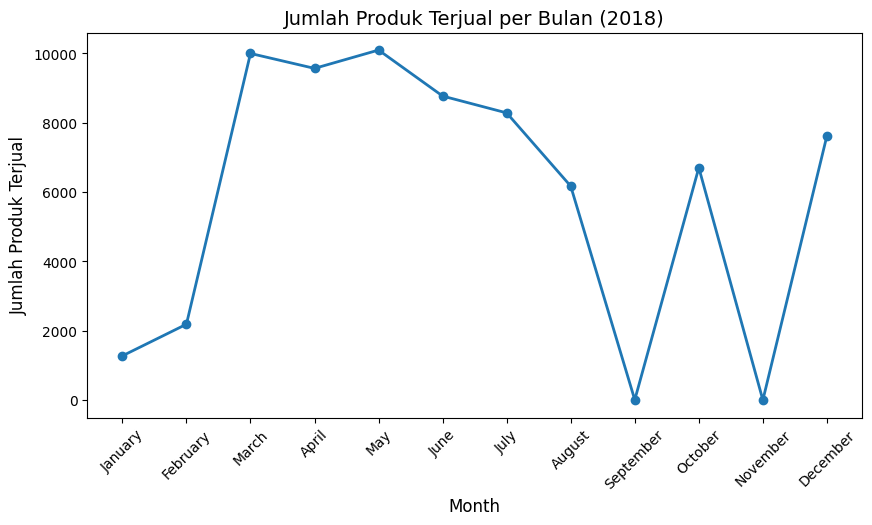

In [74]:
# Mengurutkan bulan dalam urutan yang benar
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_data["order_date"] = pd.Categorical(monthly_data["order_date"], categories=months_order, ordered=True)

# Mengurutkan berdasarkan tanggal pemesanan
monthly_data = monthly_data.sort_values("order_date")

# Plotting jumlah produk yang terjual per bulan
plt.figure(figsize=(10, 5))
plt.plot(monthly_data["order_date"], monthly_data["total_products_sold"], marker="o", linewidth=2)
plt.title("Jumlah Produk Terjual per Bulan (2018)", loc="center", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Jumlah Produk Terjual", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Grafik ini memberikan visualisasi yang menunjukkan fluktuasi penjualan dari bulan ke bulan. Dari pola yang tampak, ada beberapa bulan di mana jumlah produk yang terjual lebih tinggi dibandingkan bulan lainnya, yang menandakan bahwa pada bulan-bulan tersebut, terjadi lonjakan penjualan.

### Pertanyaan 2: Kategori Produk Mana yang Mendapatkan Pendapatan Tertinggi dan Terendah?

Untuk menjawab pertanyaan ini, kita akan membuat DataFrame baru yang berisi data kategori produk dan total pendapatan dari masing-masing kategori. Kemudian, jumlah pendapatan tiap kategori akan divisualisasikan menggunakan bar chart.

In [75]:
# Mengelompokkan data berdasarkan kategori produk dan menjumlahkan total pendapatan
revenue_per_category = all_data.groupby("product_category_name_english")["payment_value"].sum().reset_index()

# Mengganti nama kolom agar lebih mudah dipahami
revenue_per_category = revenue_per_category.rename(columns={"payment_value": "total_revenue"})

# Mengurutkan data berdasarkan total pendapatan secara menurun
revenue_per_category = revenue_per_category.sort_values(by="total_revenue", ascending=False)

# Menampilkan DataFrame hasil
revenue_per_category


,product_category_name_english,total_revenue
7,bed_bath_table,1723774.95
43,health_beauty,1625923.50
15,computers_accessories,1563195.50
39,furniture_decor,1407615.15
70,watches_gifts,1388383.11
...,...,...
35,flowers,2213.01
46,home_comfort_2,1710.54
11,cds_dvds_musicals,1199.43
29,fashion_childrens_clothes,718.98


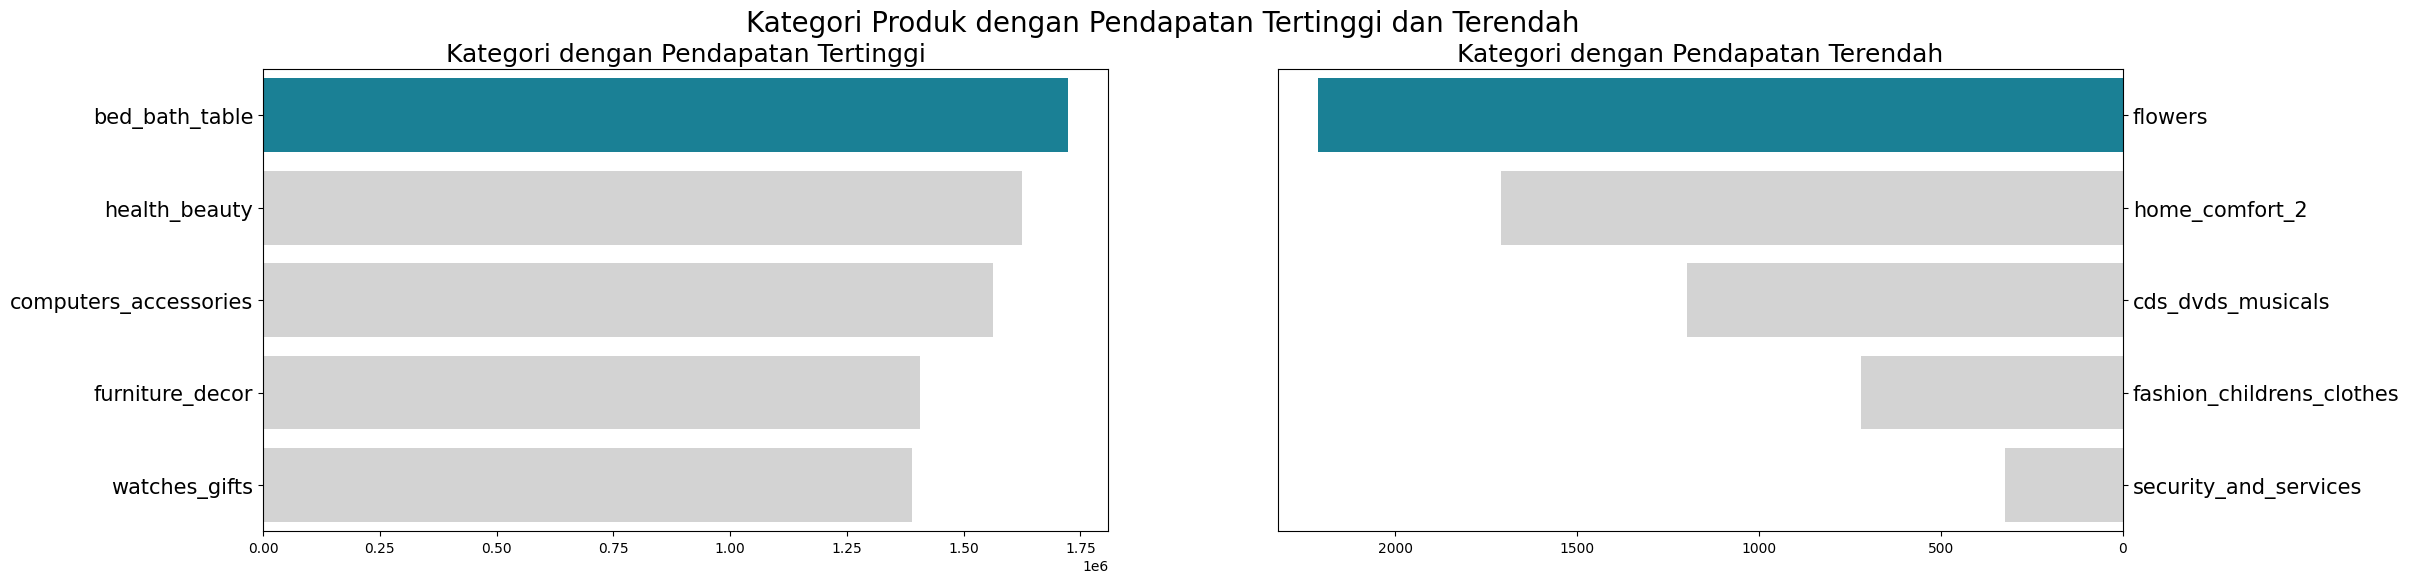

In [76]:
# Mengatur subplot dengan 2 kolom
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Warna untuk grafik
colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Barplot untuk 5 kategori dengan pendapatan tertinggi
sns.barplot(x="total_revenue", y="product_category_name_english", data=revenue_per_category.head(5), ax=ax[0], hue="product_category_name_english", palette=colors, legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Kategori dengan Pendapatan Tertinggi", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

# Barplot untuk 5 kategori dengan pendapatan terendah
sns.barplot(x="total_revenue", y="product_category_name_english", data=revenue_per_category.tail(5), ax=ax[1], hue="product_category_name_english", palette=colors, legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Kategori dengan Pendapatan Terendah", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

# Menambahkan judul utama pada seluruh grafik
plt.suptitle("Kategori Produk dengan Pendapatan Tertinggi dan Terendah", fontsize=20)
plt.show()


### Pertanyaan 3:Berapa jumlah pesanan dari masing-masing negara bagian (state)?

Untuk menjawab pertanyaan ini, kita akan membuat visualisasi bar chart yang menampilkan jumlah pesanan berdasarkan negara bagian (state), dengan menyoroti negara bagian dengan jumlah pesanan terbanyak.

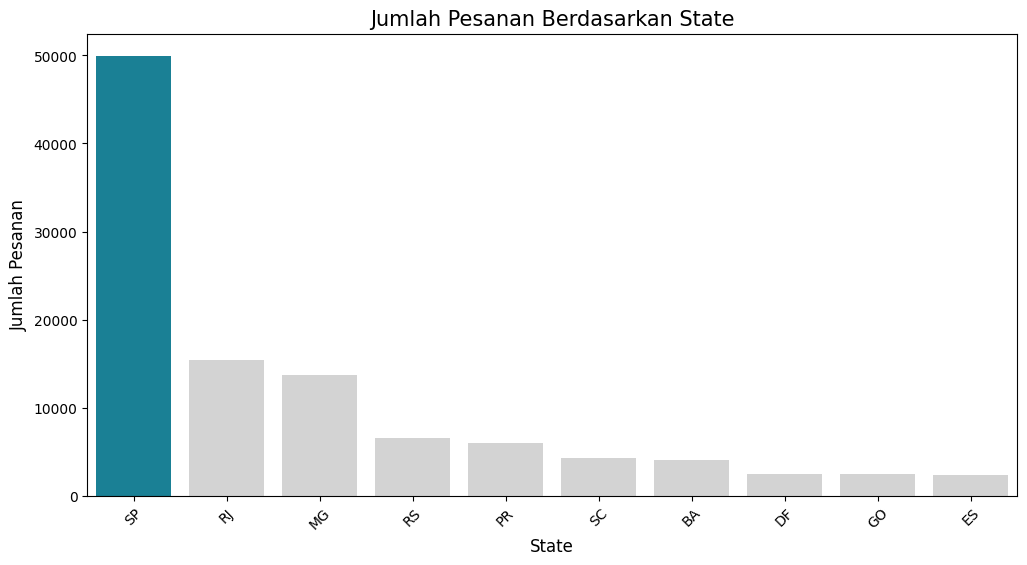

In [77]:
# Menghitung jumlah pesanan berdasarkan negara bagian
orders_by_state = all_data['customer_state'].value_counts().head(10)

# Mengatur ukuran plot
plt.figure(figsize=(12, 6))

# Mencari negara bagian dengan jumlah pesanan terbanyak
most_common_state = orders_by_state.idxmax()

# Membuat kolom 'highlight' untuk membedakan negara bagian dengan pesanan terbanyak
orders_by_state_highlight = ["Most Common" if state == most_common_state else "Other" for state in orders_by_state.index]

# Membuat barplot untuk menampilkan jumlah pesanan berdasarkan negara bagian
sns.barplot(x=orders_by_state.index, y=orders_by_state.values, hue=orders_by_state_highlight,
            palette={"Most Common": "#068DA9", "Other": "#D3D3D3"}, dodge=False)

# Menonaktifkan legenda karena tidak diperlukan
plt.legend([],[], frameon=False)

# Menambahkan judul dan label pada grafik
plt.title("Jumlah Pesanan Berdasarkan State", fontsize=15)
plt.xlabel("State", fontsize=12)
plt.ylabel("Jumlah Pesanan", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()


## 
## Conclusion

* Penjualan e-commerce stabil dari Januari hingga Mei, dengan peningkatan kecil pada Juni-Agustus. Terjadi penurunan signifikan pada September, diikuti kenaikan tajam di November, sebelum kembali menurun pada Desember 2018.
* Kategori produk bed_bath_table menjadi yang paling banyak terjual dengan 11.814 unit, sedangkan security_and_service terjual paling sedikit dengan hanya 2 unit.
* Sao Paulo adalah kota dengan pelanggan terbanyak, dan SP adalah negara bagian dengan jumlah pelanggan terbesar.
* Dari analisis RFM, sebagian besar pelanggan bertransaksi kembali dalam waktu singkat, dengan mayoritas melakukan satu transaksi dalam beberapa bulan terakhir. Pelanggan tertinggi menghabiskan lebih dari 100.000 dalam satu transaksi.

In [80]:

# Membaca file CSV
customers = pd.read_csv("customers_dataset.csv")
geolocation = pd.read_csv("geolocation_dataset.csv")
order_items = pd.read_csv("order_items_dataset.csv")
order_payments = pd.read_csv("order_payments_dataset.csv")
order_reviews = pd.read_csv("order_reviews_dataset.csv")
orders = pd.read_csv("orders_dataset.csv")
product_category = pd.read_csv("product_category_name_translation.csv")
products = pd.read_csv("products_dataset.csv")
sellers = pd.read_csv("sellers_dataset.csv")

# Menggabungkan DataFrame berdasarkan kolom yang relevan
all_df = pd.merge(orders, order_items, on="order_id")
all_df = pd.merge(all_df, order_payments, on="order_id")
all_df = pd.merge(all_df, order_reviews, on="order_id", how="left")
all_df = pd.merge(all_df, customers, on="customer_id")
all_df = pd.merge(all_df, products, on="product_id")
all_df = pd.merge(all_df, sellers, on="seller_id")
all_df = pd.merge(all_df, product_category, on="product_category_name")

# Menyimpan ke file CSV
all_df.to_csv("all_data.csv", index=False)

# Menampilkan 5 baris pertama dari all_df
print(all_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10